# Solves the boundary problem

## Aristova XI.9.5

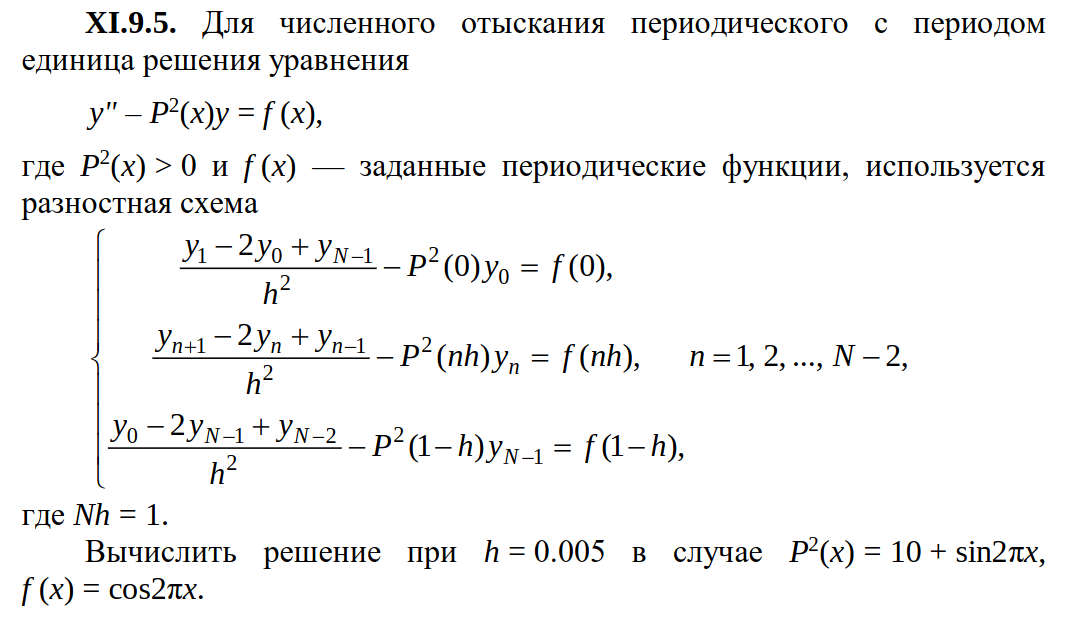

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
h = 0.005
N = int(1.0/h)
assert (N * h == 1)

def f(x):
    return np.cos(2 * np.pi * x)

def P2(x):
    return 10 + np.sin(2 * np.pi * x)

In [94]:
A = np.zeros(N)
B = np.zeros(N)
C = np.zeros(N)
r = np.zeros(N)

h2 = h**2

for n in range(0, N):
    A[n] = 1.0
    B[n] = 2.0 + P2(n * h) * h2
    C[n] = 1.0
    
    r[n] = f(n * h) * h2

In [102]:
def alpha_next(alpha, a, b, c):
    return c/(b - alpha * a)

def beta_next(alpha, beta, phi, a, b):
    return (a * beta - phi) / (b - alpha * a)

def gamma_next(alpha, gamma, a, b):
    return (a * gamma) / (b - alpha * a)

def y_next(alpha, beta, gamma, y, yN):
    return alpha * y + beta + gamma * yN

In [103]:
alphas = np.zeros(N)
betas  = np.zeros(N)
gammas = np.zeros(N)

alphas[1] =  C[0] / B[0]
betas[1]  = -r[0] / B[0]
gammas[1] =  A[0] / B[0]

# Прогонка в прямом направлении
for kk in range(1, N - 1):
    alphas[kk + 1] = alpha_next(alphas[kk], A[kk], B[kk], C[kk])
    betas[kk + 1]  = beta_next(alphas[kk], betas[kk], r[kk], A[kk], B[kk])
    gammas[kk + 1] = gamma_next(alphas[kk], gammas[kk], A[kk], B[kk])

In [104]:
mus = np.zeros(N)
nus = np.zeros(N)

mus[N-1] = -C[N-1] / (A[N-1] * (alphas[N-1] + gammas[N-1]) - B[N-1])
nus[N-1] = (r[N-1] - A[N-1] * betas[N - 1]) / (A[N-1] * (alphas[N - 1] + gammas[N - 1]) - B[N-1])

for kk in range(N - 2, -1, -1):
    mus[kk] = alphas[kk + 1] * mus[kk + 1] + gammas[kk + 1] * mus[N - 1]
    nus[kk] = alphas[kk + 1] * nus[kk + 1] + gammas[kk + 1] * nus[N - 1] + betas[kk + 1]

In [105]:
y0 = nus[0] / (1 - mus[0])
yN = mus[N-1] * y0 + nus[N-1]

In [106]:
ys = np.zeros(N)
ys[0] = y0
ys[N-1] = yN

for kk in range(N - 1, 0, -1):
    ys[kk - 1] = y_next(alphas[kk], betas[kk], gammas[kk], ys[kk], yN)

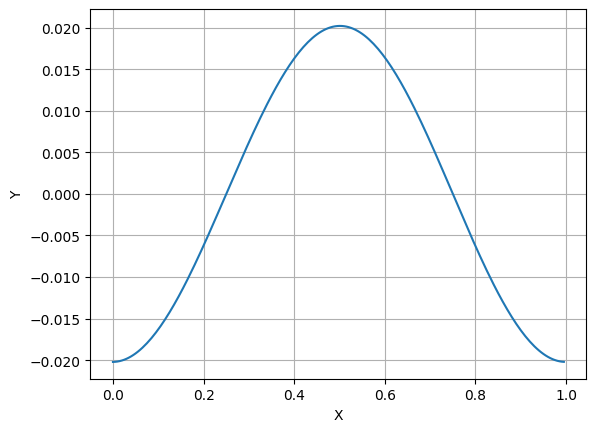

In [107]:
xs = np.arange(0, 1.0, h)
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xs, ys)

### Checking that the solution is periodic

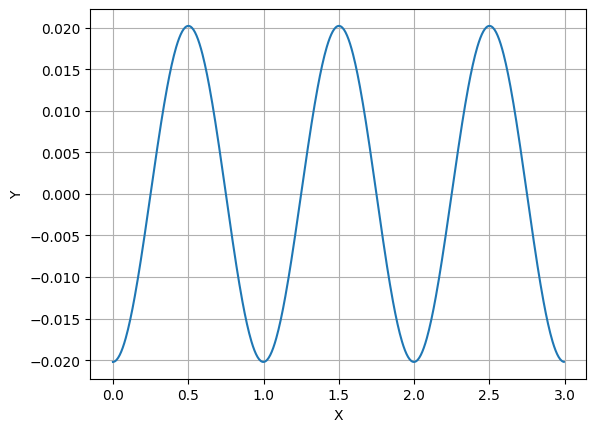

In [108]:
repetitions = 3

plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.arange(0, 1.0 * repetitions, h), np.tile(ys, repetitions))